# Australian Rain Predictor->Using Decision Trees and Random Forests
![](https://i.imgur.com/N8aIuRK.jpg)

**Guided by:** [Aakash NS](https://jovian.ai/aakashns)

## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to use _decision trees_ and _random forests_ to solve a real-world problem from [Kaggle](https://kaggle.com/datasets):

> **QUESTION**: The [Rain in Australia dataset](https://kaggle.com/jsphyg/weather-dataset-rattle-package) contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/5QNJvir.png)
>
> As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow. 
>
>
> ![](https://i.imgur.com/KWfcpcO.png)


In [55]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

In [56]:
raw_df=pd.read_csv("weatherAUS.csv")

In [57]:
raw_df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [58]:
heads=raw_df.columns
heads=heads[1:-1]
heads

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

###### EDA-> Finding relationship with RainTomorrow

In [131]:
#for head in heads:
#    px.histogram(data_frame=raw_df, x=head,color="RainTomorrow",title=f"{head} Vs RainTomorrow").show()

In [60]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [61]:
# Removing all rows which has null value in target column
raw_df.dropna(subset=["RainTomorrow"],inplace=True)

In [62]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Preparing the Data for Training

C:\Users\91808\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



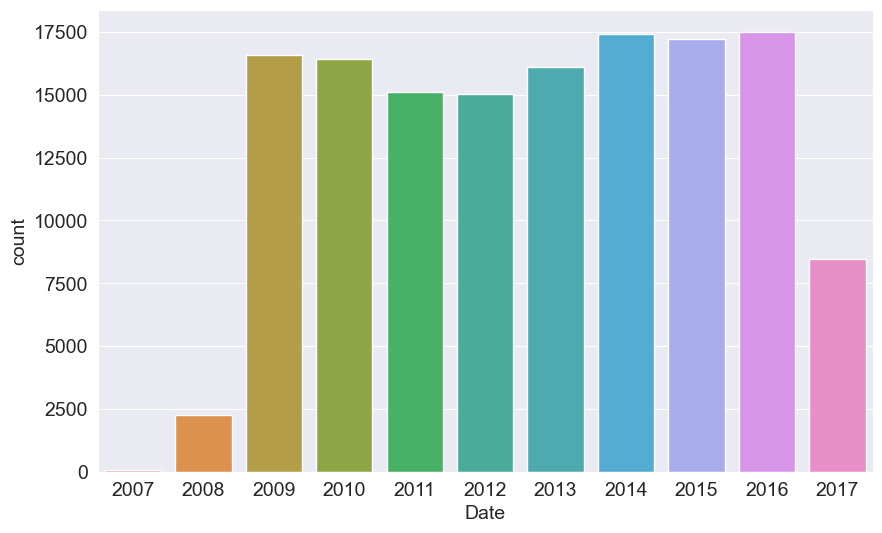

In [63]:
sns.countplot(pd.to_datetime(raw_df['Date']).dt.year)
plt.show()

In [64]:
#Spliting Tor train, Validationand train dataset
years = pd.to_datetime(raw_df['Date']).dt.year
train_df = raw_df[years<2015]
val_df = raw_df[years==2015]
test_df = raw_df[years>2015]

In [65]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


### Input and Target Columns

In [66]:
input_cols=raw_df.columns[1:-1]
target_cols=raw_df.columns[-1]

In [67]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()

test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()

In [68]:
#Finding Numeric and Categorical Columns
numeric_cols=train_inputs.select_dtypes(include='number').columns.tolist()
cat_cols=train_inputs.select_dtypes(include='object').columns.tolist()

In [69]:
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

###  Imputing missing numeric values

In [70]:
from sklearn.impute import SimpleImputer

In [71]:
imputer=SimpleImputer().fit(raw_df[numeric_cols])

In [72]:
imputer.statistics_ 

array([  12.18639973,   23.22678419,    2.34997407,    5.46982422,
          7.62485311,   39.98429166,   14.001988  ,   18.63757586,
         68.84381031,   51.48260609, 1017.65375842, 1015.25820354,
          4.43718939,    4.5031669 ,   16.98750858,   21.68723497])

In [73]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])

In [74]:
train_inputs[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98988 entries, 0 to 144552
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        98988 non-null  float64
 1   MaxTemp        98988 non-null  float64
 2   Rainfall       98988 non-null  float64
 3   Evaporation    98988 non-null  float64
 4   Sunshine       98988 non-null  float64
 5   WindGustSpeed  98988 non-null  float64
 6   WindSpeed9am   98988 non-null  float64
 7   WindSpeed3pm   98988 non-null  float64
 8   Humidity9am    98988 non-null  float64
 9   Humidity3pm    98988 non-null  float64
 10  Pressure9am    98988 non-null  float64
 11  Pressure3pm    98988 non-null  float64
 12  Cloud9am       98988 non-null  float64
 13  Cloud3pm       98988 non-null  float64
 14  Temp9am        98988 non-null  float64
 15  Temp3pm        98988 non-null  float64
dtypes: float64(16)
memory usage: 12.8 MB


#### Imputing missing Categorical values

In [75]:
imputer=SimpleImputer(strategy="most_frequent").fit(raw_df[cat_cols])
# Using Most frequent isn't the best way, When I will learn a better way, will try to update it here:)

In [76]:
train_inputs[cat_cols]=imputer.transform(train_inputs[cat_cols])
test_inputs[cat_cols]=imputer.transform(test_inputs[cat_cols])
val_inputs[cat_cols]=imputer.transform(val_inputs[cat_cols])

### Scaling Numeric Features

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler=MinMaxScaler().fit(raw_df[numeric_cols])

In [79]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])

In [80]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,0.516509,0.523629,0.001617,0.037723,0.525852,W,0.294574,W,WNW,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,No
1,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,WSW,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,No
2,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,WSW,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,No
3,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,E,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,No
4,Albury,0.613208,0.701323,0.002695,0.037723,0.525852,W,0.271318,ENE,NW,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037723,0.525852,SSE,0.286822,ESE,SSE,0.184615,0.298851,0.22,0.13,0.555372,0.5232,0.493021,0.500352,0.651899,0.714012,No
144549,Uluru,0.556604,0.786389,0.000000,0.037723,0.525852,NE,0.193798,ENE,SW,0.146154,0.229885,0.16,0.08,0.530579,0.4880,0.493021,0.500352,0.761603,0.771593,No
144550,Uluru,0.608491,0.805293,0.000000,0.037723,0.525852,ESE,0.255814,ESE,SSE,0.200000,0.103448,0.15,0.08,0.519008,0.4944,0.493021,0.500352,0.778481,0.788868,No
144551,Uluru,0.674528,0.818526,0.000000,0.037723,0.525852,ESE,0.286822,ESE,SSW,0.215385,0.195402,0.22,0.09,0.553719,0.5136,0.493021,0.500352,0.780591,0.817658,No


In [81]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98988 entries, 0 to 144552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       98988 non-null  object 
 1   MinTemp        98988 non-null  float64
 2   MaxTemp        98988 non-null  float64
 3   Rainfall       98988 non-null  float64
 4   Evaporation    98988 non-null  float64
 5   Sunshine       98988 non-null  float64
 6   WindGustDir    98988 non-null  object 
 7   WindGustSpeed  98988 non-null  float64
 8   WindDir9am     98988 non-null  object 
 9   WindDir3pm     98988 non-null  object 
 10  WindSpeed9am   98988 non-null  float64
 11  WindSpeed3pm   98988 non-null  float64
 12  Humidity9am    98988 non-null  float64
 13  Humidity3pm    98988 non-null  float64
 14  Pressure9am    98988 non-null  float64
 15  Pressure3pm    98988 non-null  float64
 16  Cloud9am       98988 non-null  float64
 17  Cloud3pm       98988 non-null  float64
 18  Temp9

### Encoding Categorical Data

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(raw_df[cat_cols])

In [84]:
encoded_heads=encoder.get_feature_names_out().tolist()

In [85]:
train_inputs[encoded_heads]=encoder.transform(train_inputs[cat_cols])
test_inputs[encoded_heads]=encoder.transform(test_inputs[cat_cols])
val_inputs[encoded_heads]=encoder.transform(val_inputs[cat_cols])

C:\Users\91808\AppData\Local\Temp\ipykernel_19832\2362811648.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\91808\AppData\Local\Temp\ipykernel_19832\2362811648.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\91808\AppData\Local\Temp\ipykernel_19832\2362811648.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [86]:
X_train = train_inputs[encoded_heads+numeric_cols]
 X_train= test_inputs[encoded_heads+numeric_cols]
X_val = val_inputs[encoded_heads+numeric_cols]

## Training and Visualizing Decision Trees

We use Gini as loss function

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
model = DecisionTreeClassifier(random_state=42)

In [89]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(random_state=42)

In [90]:
model.score(X_train,train_targets)

0.9999797955307714

In [91]:
model.score(X_val,val_targets)

0.7907260170622715

From above we can get to a point that our current model Learned everything possible from the Training Dataset and it got Overfitted.

### Visualization

In [92]:
from sklearn.tree import plot_tree, export_text

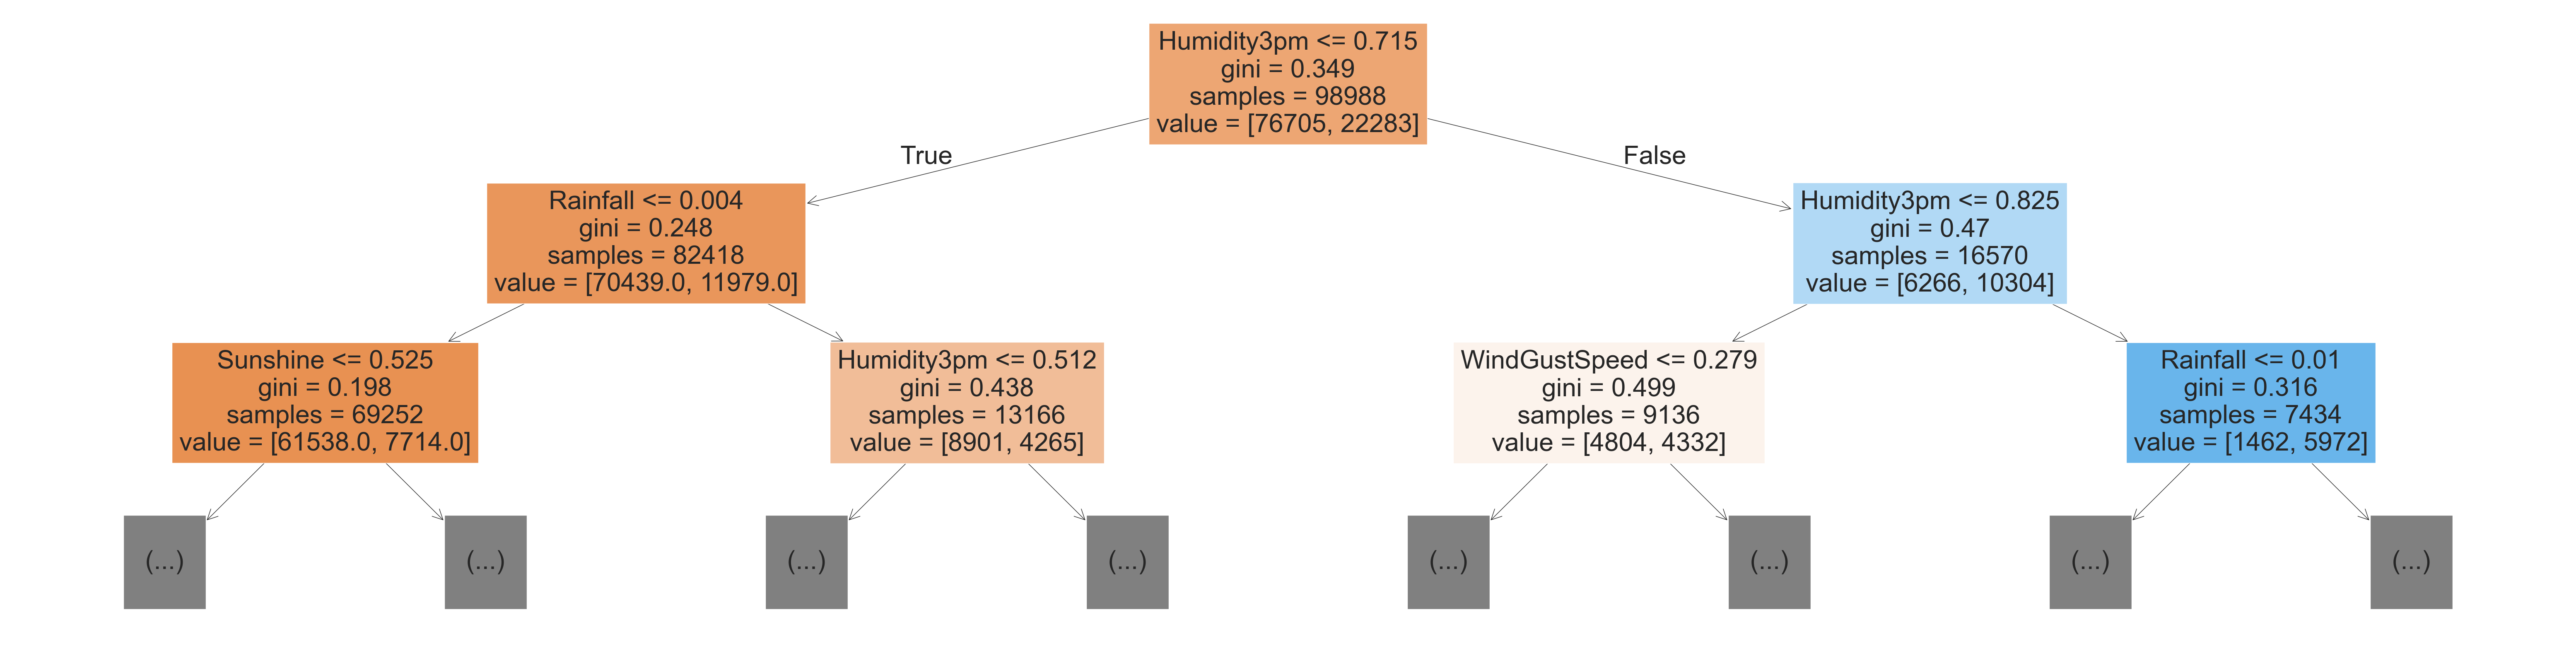

In [93]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [94]:
model.tree_.max_depth

52

### Feature Importance

In [95]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
112,Humidity3pm,0.262309
114,Pressure3pm,0.061927
105,Rainfall,0.059728
108,WindGustSpeed,0.056157
107,Sunshine,0.049727
111,Humidity9am,0.039348
103,MinTemp,0.037058
113,Pressure9am,0.034570
117,Temp9am,0.032455
104,MaxTemp,0.031122


## Hyperparameter Tuning and Overfitting
Reducing Overfitting in the model

In [96]:
?DecisionTreeClassifier

In [97]:
model = DecisionTreeClassifier(random_state=42,max_depth=3)

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [98]:
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [99]:
model.score(X_train,train_targets)

0.8291308037337859

In [100]:
model.score(X_val,val_targets)

0.8334397307178921

This looks better, Let's find which value of max depth give best value.

In [101]:
train_error=[]
val_error=[]
nums=[]
for n in range(1,25):
    model = DecisionTreeClassifier(random_state=42,max_depth=n)
    model.fit(X_train,train_targets)
    train_error.append(1-model.score(X_train,train_targets))
    val_error.append(1-model.score(X_val,val_targets))
    nums.append(n)

In [102]:
data = {
    "Max_Depth": nums,
    "Training Error": train_error,
    "Validation Error": val_error
}

errors_df = pd.DataFrame(data)

In [103]:
errors_df

,Max_Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156211,0.157275
6,7,0.153231,0.154721
7,8,0.147715,0.157449
8,9,0.140896,0.156578
9,10,0.132865,0.157159


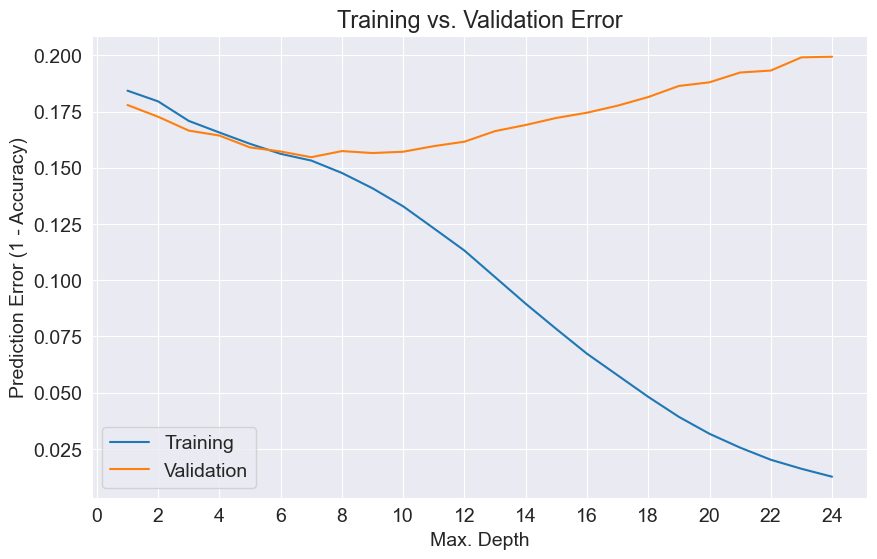

In [104]:
plt.figure()
plt.plot(errors_df['Max_Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max_Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,26, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [105]:
model=DecisionTreeClassifier(random_state=42,max_depth=7)
model.fit(X_train,train_targets)
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.8467693053703479, 0.8452788578724392)

In [109]:
model=DecisionTreeClassifier(random_state=42,max_depth=7)
model.fit(X_train,train_targets)
model.score(X_test,test_targets)

0.830984830984831

# Training a Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=500,
                               max_features="log2",
                              class_weight="balanced")
model.fit(X_train, train_targets)
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.8544483779235099)

In [130]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=500,
                               max_features="log2",
                              class_weight={'No': 1, 'Yes': 1.5})
model.fit(X_train, train_targets)
model.score(X_train,train_targets),model.score(X_val,val_targets)

(0.9999797955307714, 0.8564215657826011)

We've increased the accuracy from 84.5% with a single decision tree to 85.7% with a well-tuned random forest.